In [1]:
import numpy as np

import sys
sys.path.append('../')

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
def figsize(scale, nplots=1):
    fig_width_pt = 390.0                               
    inches_per_pt = 1.0/72.27
    golden_mean = (np.sqrt(5.0)-1.0)/2.0
    fig_width = fig_width_pt*inches_per_pt*scale 
    fig_height = fig_width*golden_mean*nplots
    fig_size = [fig_width,fig_height]
    return fig_size

import pandas as pd

from hts.preprocess import clean
from hts.preprocess import process_data

figs_path = '../figs'
data_path_shallow = '../hts/data/shallow.csv'
data_path_deep = '../hts/data/deep.csv'

In [2]:
raw_data_shallow = pd.read_csv(data_path_shallow)
raw_data_deep = pd.read_csv(data_path_deep)
df_shallow = clean(raw_data_shallow, roll_step=18, temp=False, absolute=False)
df_deep = clean(raw_data_deep, roll_step=18, temp=False, absolute=False)

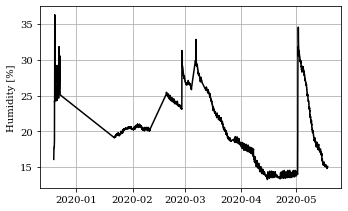

In [3]:
fig = plt.figure(figsize=figsize(1, 1))
plt.plot(df_shallow.humidity, 'k-')
plt.ylabel('Humidity [%]')
plt.grid()
plt.show()
fig.savefig(f'{figs_path}/shallow_humidity-in-time.pdf', bbox_inches='tight')

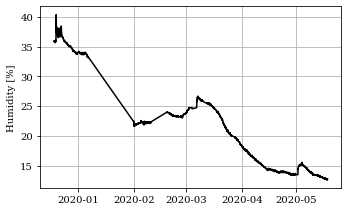

In [4]:
fig = plt.figure(figsize=figsize(1, 1))
plt.plot(df_deep.humidity, 'k-')
plt.ylabel('Humidity [%]')
plt.grid()
plt.show()
fig.savefig(f'{figs_path}/deep_humidity-in-time.pdf', bbox_inches='tight')

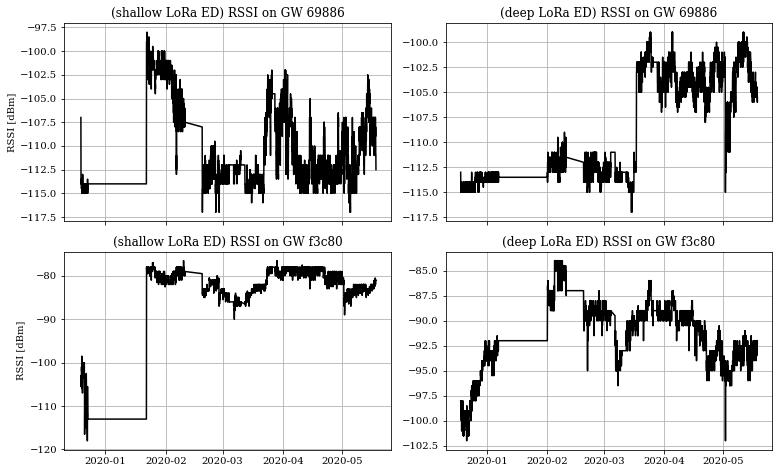

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=figsize(2, 1))
axs[0,0].plot(df_shallow['69886_rssi'], 'k-')
axs[0,0].set_ylabel('RSSI [dBm]')
axs[0,0].grid()
axs[0,0].set_title('(shallow LoRa ED) RSSI on GW 69886')

axs[1,0].plot(df_shallow['f3c80_rssi'], 'k-')
axs[1,0].set_ylabel('RSSI [dBm]')
axs[1,0].grid()
axs[1,0].set_title('(shallow LoRa ED) RSSI on GW f3c80')


axs[0,1].plot(df_deep['69886_rssi'], 'k-')
axs[0,1].grid()
axs[0,1].set_title('(deep LoRa ED) RSSI on GW 69886')

axs[1,1].plot(df_deep['f3c80_rssi'], 'k-')
axs[1,1].grid()
axs[1,1].set_title('(deep LoRa ED) RSSI on GW f3c80')

plt.tight_layout()
plt.show()
fig.savefig(f'{figs_path}/rssi-in-time.pdf', bbox_inches='tight')